## This notebook analyses several special cases examples

In [15]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
#Path to save figures
path = "figures/"
df_pop = pd.read_csv('input_data/covid_county_population_usafacts.csv')
df_deaths = pd.read_csv('input_data/covid_deaths_usafacts.csv')
df_cases = pd.read_csv('input_data/covid_confirmed_usafacts.csv')
df_vax = pd.read_csv('input_data/COVID-19_Vaccinations_in_the_United_States_County.csv')

/home/joanna_len/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [17]:
def days_of_months_printer(month, no_days, year=2022):
    month = "0" * (2-len(str(month))) + str(month)
    list_of_days = list()
    for i in range(1, no_days+1):
        list_of_days.append(month + "/" + "0" * (2-len(str(i))) + str(i) + "/" + str(year))
    return list_of_days

def days_of_months_printer_ww(month, no_days, year=2022):
    month = "0" * (2-len(str(month))) + str(month)
    list_of_days = list()
    for i in range(1, no_days+1):
        list_of_days.append(str(year) + "-" + month + "-" + "0" * (2-len(str(i))) + str(i))
    return list_of_days

### Blaine County, Twin Falls County, Ada County

In [18]:
counties_to_analyse = ['Blaine County', 'Twin Falls County', 'Ada County', 'Madison County']
fips_to_analyse = [16013, 16083, 16001, 30057]
days =  days_of_months_printer(1, 31) + days_of_months_printer(2, 28)  + days_of_months_printer(3, 22) + ['2022-04-01']
lst_filter_vax = []
for fips in fips_to_analyse:
    fips_f = '0' * (5 - len(str(fips))) + str(fips)
    lst_filter_vax.extend(df_vax.loc[(df_vax['FIPS'] == fips_f) & (df_vax['Date'].isin(days))].values.tolist())
df_filter_vax = pd.DataFrame(lst_filter_vax, columns = df_vax.columns)
df_filter_vax

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,...,Booster_Doses_Vax_Pct_UR_Equity,Booster_Doses_12PlusVax_Pct_UR_Equity,Booster_Doses_18PlusVax_Pct_UR_Equity,Booster_Doses_65PlusVax_Pct_UR_Equity,Census2019,Census2019_5PlusPop,Census2019_5to17Pop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop
0,03/22/2022,16013,12,Blaine County,ID,97.8,21501.0,93.4,21500.0,95.0,...,NaN,NaN,NaN,NaN,23021.0,21922.0,NaN,20109.0,18163.0,4683.0
1,03/21/2022,16013,12,Blaine County,ID,97.8,21499.0,93.4,21498.0,95.0,...,NaN,NaN,NaN,NaN,23021.0,21922.0,NaN,20109.0,18163.0,4683.0
2,03/20/2022,16013,12,Blaine County,ID,97.8,21499.0,93.4,21498.0,95.0,...,NaN,NaN,NaN,NaN,23021.0,21922.0,NaN,20109.0,18163.0,4683.0
3,03/19/2022,16013,11,Blaine County,ID,97.8,21497.0,93.4,21496.0,95.0,...,NaN,NaN,NaN,NaN,23021.0,21922.0,NaN,20109.0,18163.0,4683.0
4,03/18/2022,16013,11,Blaine County,ID,97.8,21492.0,93.4,21491.0,95.0,...,NaN,NaN,NaN,NaN,23021.0,21922.0,NaN,20109.0,18163.0,4683.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,01/05/2022,30057,1,Madison County,MT,95.8,4209.0,48.9,4209.0,50.7,...,NaN,NaN,NaN,NaN,8600.0,8298.0,NaN,7777.0,7283.0,2540.0
320,01/04/2022,30057,1,Madison County,MT,95.8,4208.0,48.9,4208.0,50.7,...,NaN,NaN,NaN,NaN,8600.0,8298.0,NaN,7777.0,7283.0,2540.0
321,01/03/2022,30057,1,Madison County,MT,95.8,4201.0,48.8,4201.0,50.6,...,NaN,NaN,NaN,NaN,8600.0,8298.0,NaN,7777.0,7283.0,2540.0
322,01/02/2022,30057,1,Madison County,MT,95.8,4201.0,48.8,4201.0,50.6,...,NaN,NaN,NaN,NaN,8600.0,8298.0,NaN,7777.0,7283.0,2540.0


In [26]:
days = days_of_months_printer_ww(1, 31) + days_of_months_printer_ww(2, 28) + days_of_months_printer_ww(3, 22)
col_relevant = ['countyFIPS', 'County Name', 'State'] + days
df_filter_cases = df_cases.loc[(df_cases['countyFIPS'].isin(fips_to_analyse))][col_relevant]

In [27]:
df_filter_cases

,countyFIPS,County Name,State,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,...,2022-03-13,2022-03-14,2022-03-15,2022-03-16,2022-03-17,2022-03-18,2022-03-19,2022-03-20,2022-03-21,2022-03-22
564,16001,Ada County,ID,89225,89225,89225,90151,90630,91092,91221,...,131990,132050,132164,132307,132488,132599,132599,132599,132727,132836
570,16013,Blaine County,ID,3540,3540,3540,3713,3780,3953,4025,...,5750,5806,5841,5894,5909,5930,5930,5930,5939,5944
605,16083,Twin Falls County,ID,17042,17042,17042,17119,17185,17294,17337,...,22960,23334,23492,23663,23730,23823,23823,23823,23940,23967
1653,30057,Madison County,MT,1444,1444,1444,1455,1472,1474,1484,...,1804,1805,1804,1803,1803,1803,1803,1803,1804,1804


In [37]:
#Blaine
population = df_pop.loc[df_pop['countyFIPS'] == 16013]['population'].values[0]
vax_full = list(df_filter_vax.loc[df_filter_vax['FIPS'] == '16013']['Series_Complete_Pop_Pct'])
vax_full = list(reversed(vax_full))
cases_per_capita = list(df_filter_cases.loc[df_filter_cases['countyFIPS'] == 16013][days].values[0])

In [38]:
# plt.title("Blaine County")
# plt.ylabel("Total cases")
# plt.xlabel("Dates")
# plt.plot(days,cases_per_capita)
# plt.xticks(['2022-01-01', '2022-01-25', '2022-03-22'])
# plt.show()

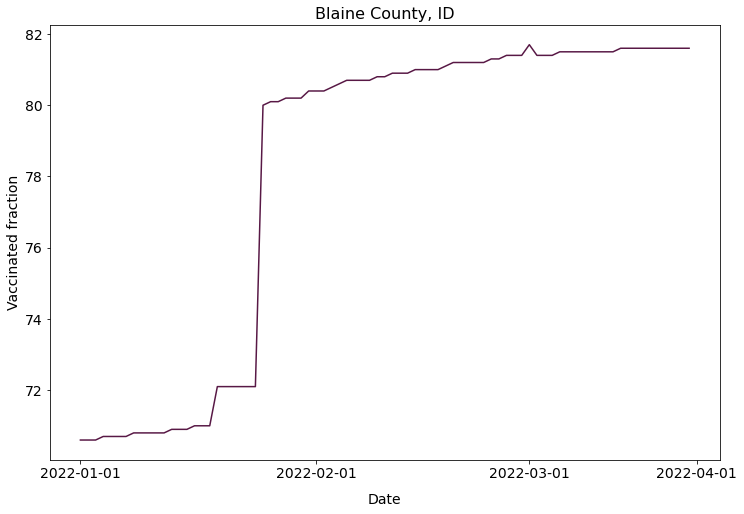

In [39]:
plt.title("Blaine County, ID", fontsize=16)
plt.ylabel("Vaccinated fraction", fontsize=14)
plt.xlabel("Date", fontsize=14, labelpad=12)
plt.plot(days,vax_full, color='#581845')
plt.xticks(['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01'], fontsize=14)
plt.yticks(fontsize=14)
plt.rcParams["figure.figsize"] = (12,8)
#plt.savefig(path + 'fig_vax_bla.png')
plt.show()

In [40]:
#Twin Falls County
population = df_pop.loc[df_pop['countyFIPS'] == 16083]['population'].values[0]
vax_full = list(df_filter_vax.loc[df_filter_vax['FIPS'] == '16083']['Series_Complete_Pop_Pct'])
vax_full = list(reversed(vax_full))
cases_per_capita = list(df_filter_cases.loc[df_filter_cases['countyFIPS'] == 16083][days].values[0])

In [41]:
# plt.title("Twin Falls County")
# plt.ylabel("Total cases")
# plt.xlabel("Dates")
# plt.plot(days,cases_per_capita)
# plt.xticks(['2022-01-01', '2022-01-25', '2022-03-22'])
# plt.show()

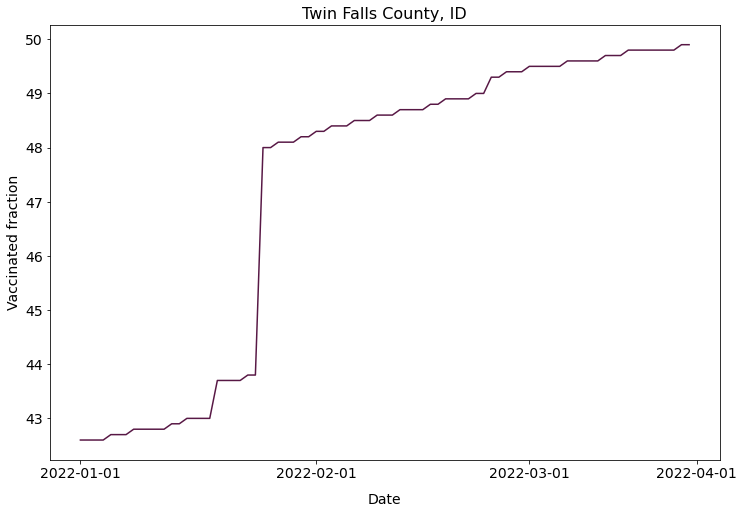

In [42]:
plt.title("Twin Falls County, ID", fontsize=16)
plt.ylabel("Vaccinated fraction", fontsize=14)
plt.xlabel("Date", fontsize=14, labelpad=12)
plt.plot(days,vax_full, color='#581845')
plt.xticks(['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01'], fontsize=14)
plt.yticks(fontsize=14)
plt.rcParams["figure.figsize"] = (12,8)
#plt.savefig(path + 'fig_vax_twin.png')
plt.show()

In [43]:
#Ada County
population = df_pop.loc[df_pop['countyFIPS'] == 16001]['population'].values[0]
vax_full = list(df_filter_vax.loc[df_filter_vax['FIPS'] == '16001']['Series_Complete_Pop_Pct'])
vax_full = list(reversed(vax_full))
cases_per_capita = list(df_filter_cases.loc[df_filter_cases['countyFIPS'] == 16001][days].values[0])

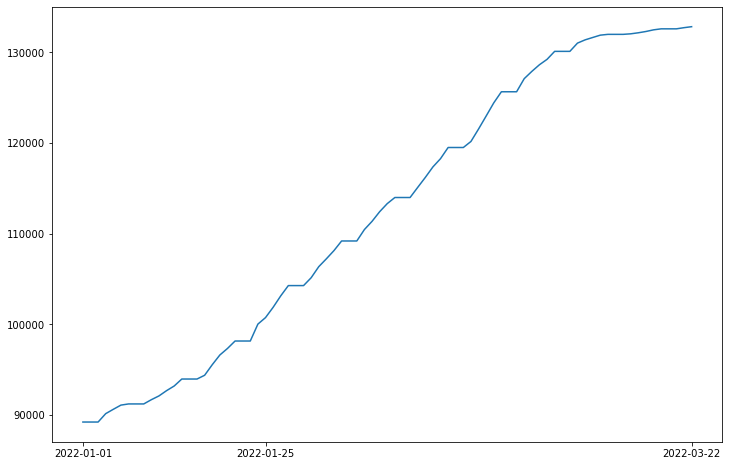

In [44]:
plt.plot(days,cases_per_capita)
plt.xticks(['2022-01-01', '2022-01-25', '2022-03-22'])
plt.show()

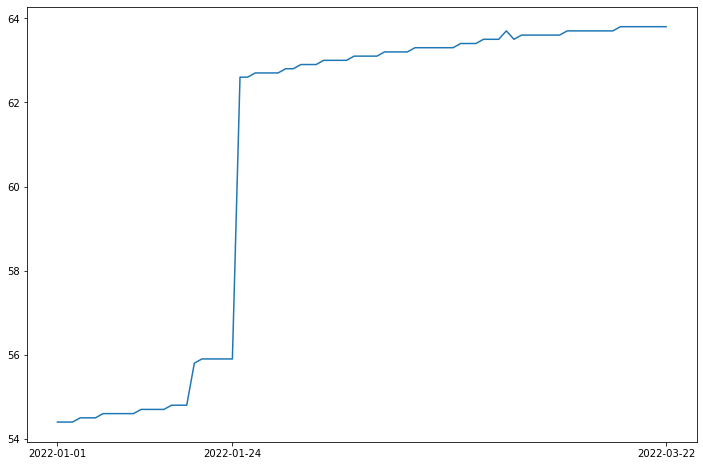

In [45]:
plt.plot(days,vax_full)
plt.xticks(['2022-01-01', '2022-01-24', '2022-03-22'])
plt.show()

In [46]:
# Montana: Madison County
# 30057
population = df_pop.loc[df_pop['countyFIPS'] == 30057]['population'].values[0]
vax_full = list(df_filter_vax.loc[df_filter_vax['FIPS'] == '30057']['Series_Complete_Pop_Pct'])
vax_full = list(reversed(vax_full))
vax_full2 = list(df_filter_vax.loc[df_filter_vax['FIPS'] == '30057']['Booster_Doses_Vax_Pct'])
vax_full2 = list(reversed(vax_full2))
cases_per_capita = list(df_filter_cases.loc[df_filter_cases['countyFIPS'] == 30057][days].values[0])

Text(0.5, 1.0, 'Fully vaccinated - Madison County')

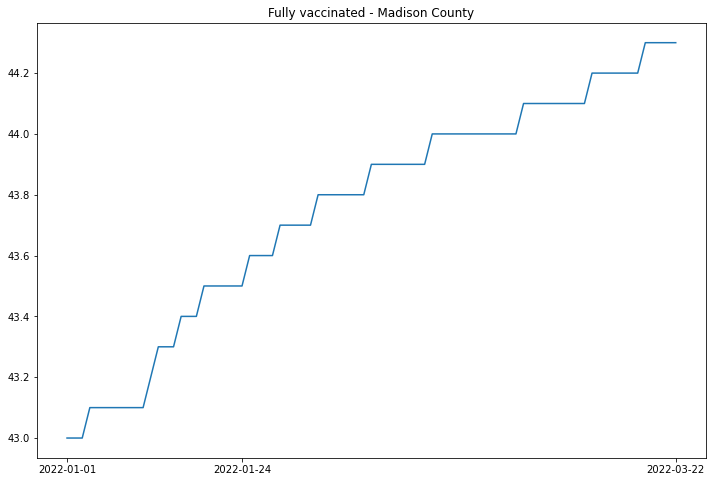

In [47]:
plt.plot(days,vax_full)
plt.xticks(['2022-01-01', '2022-01-24', '2022-03-22'])
plt.title("Fully vaccinated - Madison County")
#plt.savefig('FullVaxMadison.png')

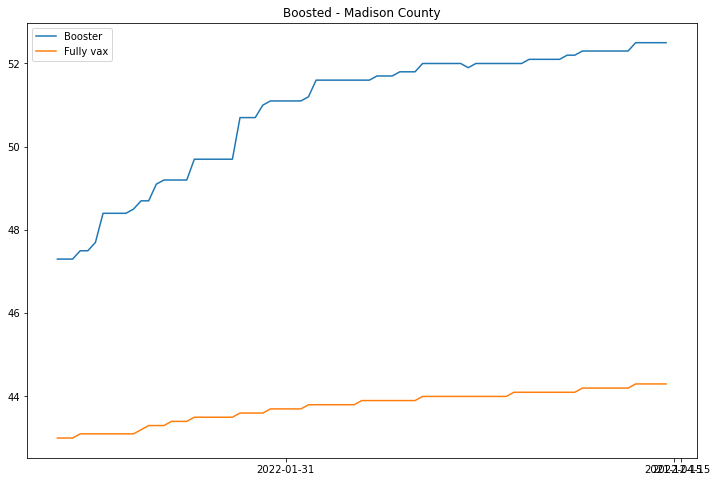

In [48]:
plt.plot(days,vax_full2, label="Booster")
plt.plot(days,vax_full, label="Fully vax")
plt.xticks(['2021-12-15', '2022-01-31', '2022-04-15'])
plt.title("Boosted - Madison County")
plt.legend()
#plt.savefig('BoostedMadison.png')

### Charlottesville and Albemarle counties

In [49]:
counties_to_analyse = ['Charlottesville City', 'Albemarle County']
fips_to_analyse = [51540, 51003]

In [50]:
days = days_of_months_printer_ww(1, 31) + days_of_months_printer_ww(2, 28) + days_of_months_printer_ww(3, 31) + days_of_months_printer_ww(4, 8)
col_relevant = ['countyFIPS', 'County Name', 'State'] + days
df_filter_cases = df_cases.loc[(df_cases['countyFIPS'].isin(fips_to_analyse))][col_relevant]
df_filter_cases

,countyFIPS,County Name,State,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,...,2022-03-30,2022-03-31,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08
2868,51003,Albemarle County,VA,9744,9744,10094,10219,10299,10455,10586,...,16361,16423,16533,16533,16533,16693,16784,16885,16885,16885
2965,51540,City of Charlottesville,VA,6225,6225,6437,6518,6569,6683,6823,...,9917,9881,9791,9791,9791,9726,9679,9575,9575,9575


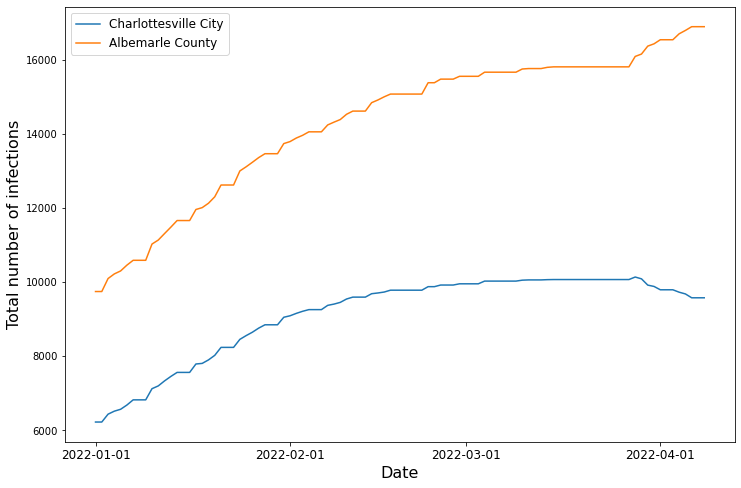

In [51]:
for idx, f in enumerate(fips_to_analyse):
    population = df_pop.loc[df_pop['countyFIPS'] == f]['population'].values[0]
    cases = list(df_filter_cases.loc[df_filter_cases['countyFIPS'] == f][days].values[0])
    cases_per_capita = list(df_filter_cases.loc[df_filter_cases['countyFIPS'] == f][days].values[0]/float(df_pop.loc[(df_pop['countyFIPS'].isin([f]))]['population']))
    plt.plot(days,cases, label=counties_to_analyse[idx])
#plt.title("Charlottesville City and Albemarle county", fontsize=20)
plt.ylabel("Total number of infections", fontsize=16)
plt.xlabel("Date", fontsize=16)
plt.xticks(['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01'], fontsize=12)
plt.legend(fontsize=12)
#plt.rcParams["figure.figsize"] = (14,9)
plt.rcParams["figure.figsize"] = (10,7)
# plt.savefig(path + 'fig_localities.png')
plt.show()

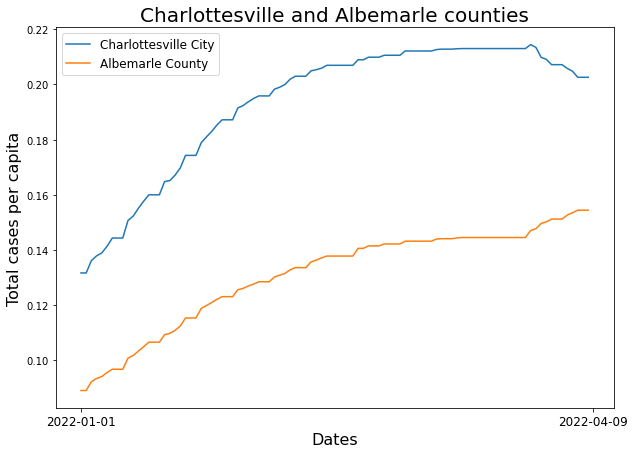

In [52]:
for idx, f in enumerate(fips_to_analyse):
    population = df_pop.loc[df_pop['countyFIPS'] == f]['population'].values[0]
    cases = list(df_filter_cases.loc[df_filter_cases['countyFIPS'] == f][days].values[0])
    cases_per_capita = list(df_filter_cases.loc[df_filter_cases['countyFIPS'] == f][days].values[0]/float(df_pop.loc[(df_pop['countyFIPS'].isin([f]))]['population']))
    plt.plot(days,cases_per_capita, label=counties_to_analyse[idx])
plt.title("Charlottesville and Albemarle counties", fontsize=20)
plt.ylabel("Total cases per capita", fontsize=16)
plt.xlabel("Dates", fontsize=16)
plt.xticks(['2022-01-01', '2022-04-09'], fontsize=12)
plt.legend(fontsize=12)
#plt.rcParams["figure.figsize"] = (14,9)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()

In [53]:
days = days_of_months_printer(11, 30, 2021)[14:] + days_of_months_printer(12, 31, 2021) + days_of_months_printer(1, 31) + days_of_months_printer(2, 28) + days_of_months_printer(3, 31) + days_of_months_printer(4, 8)
#days = days_of_months_printer(1, 31)
lst_filter_vax = []
for fips in fips_to_analyse:
    fips_f = '0' * (5 - len(str(fips))) + str(fips)
    lst_filter_vax.extend(df_vax.loc[(df_vax['FIPS'] == fips_f) & (df_vax['Date'].isin(days))].values.tolist())

In [54]:
df_filter_vax = pd.DataFrame(lst_filter_vax, columns = df_vax.columns)

#### Day by day [daily increase of cases] from 21th March 2022 to 8th April 2022

In [55]:
df_filter_cases

,countyFIPS,County Name,State,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,...,2022-03-30,2022-03-31,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08
2868,51003,Albemarle County,VA,9744,9744,10094,10219,10299,10455,10586,...,16361,16423,16533,16533,16533,16693,16784,16885,16885,16885
2965,51540,City of Charlottesville,VA,6225,6225,6437,6518,6569,6683,6823,...,9917,9881,9791,9791,9791,9726,9679,9575,9575,9575


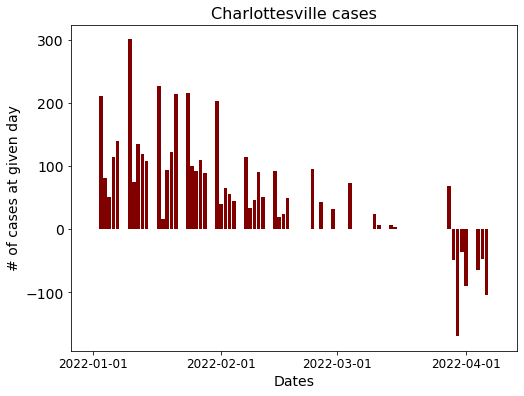

In [56]:
days = ['2022-01-01'] + days_of_months_printer_ww(1, 31) + days_of_months_printer_ww(2, 28) + days_of_months_printer_ww(3, 31) + days_of_months_printer_ww(4, 8)
y_charlottesville  =  list(df_filter_cases.loc[df_filter_cases['countyFIPS'] == fips_to_analyse[0]][days].values[0])
y_charlottesville = [j-i for i, j in zip(y_charlottesville[:-1], y_charlottesville[1:])]
days = days[1:]
# x_tmp = list()
# for d in days:
#     year, month, day = d.split("-")
#     x_tmp.append(month + "/" + day + "/" + year[2:])
plt.bar(days, y_charlottesville, color ='maroon', width = 0.9)
plt.title("Charlottesville cases", fontsize=16)
plt.ylabel("# of cases at given day", fontsize=14)
plt.xlabel("Dates", fontsize=14)
#plt.xticks(['01/01/22', '03/31/22', '04/08/22'], fontsize=14)
plt.xticks(['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01'], fontsize=12)
plt.yticks(fontsize=14)
#plt.legend(fontsize=12)
plt.rcParams["figure.figsize"] = (10,7)
plt.show()
#df_filter_cases.loc[df_filter_cases['countyFIPS'] == fips_to_analyse[0]][days]

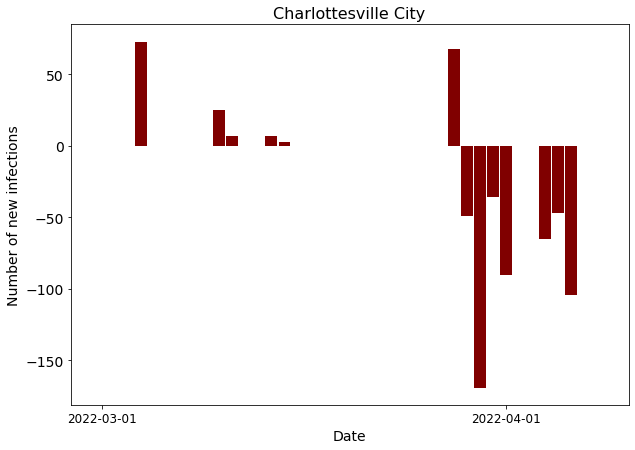

In [57]:
days = ['2022-03-01'] + days_of_months_printer_ww(3, 31) + days_of_months_printer_ww(4, 8)
y_charlottesville  =  list(df_filter_cases.loc[df_filter_cases['countyFIPS'] == fips_to_analyse[0]][days].values[0])
y_charlottesville = [j-i for i, j in zip(y_charlottesville[:-1], y_charlottesville[1:])]
days = days[1:]
# x_tmp = list()
# for d in days:
#     year, month, day = d.split("-")
#     x_tmp.append(month + "/" + day + "/" + year[2:])
plt.bar(days, y_charlottesville, color ='maroon', width = 0.9)
plt.title("Charlottesville City", fontsize=16)
plt.ylabel("Number of new infections", fontsize=14)
plt.xlabel("Date", fontsize=14)
#plt.xticks(['01/01/22', '03/31/22', '04/08/22'], fontsize=14)
plt.xticks(['2022-03-01', '2022-04-01'], fontsize=12)
plt.yticks(fontsize=14)
#plt.legend(fontsize=12)
plt.rcParams["figure.figsize"] = (10,7)
# plt.savefig(path + 'fig_cho_cases.png')
plt.show()
#df_filter_cases.loc[df_filter_cases['countyFIPS'] == fips_to_analyse[0]][days]

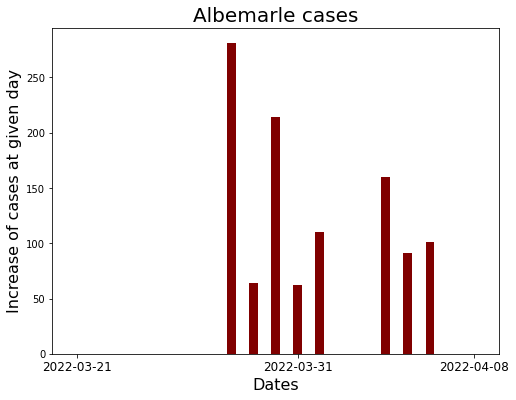

In [59]:
days = days_of_months_printer_ww(3, 31)[19:] + days_of_months_printer_ww(4, 8)
y_albemarle =  list(df_filter_cases.loc[df_filter_cases['countyFIPS'] == fips_to_analyse[1]][days].values[0])
y_albemarle = [j-i for i, j in zip(y_albemarle[:-1], y_albemarle[1:])]
days = days[1:]
plt.bar(days, y_albemarle, color ='maroon', width = 0.4)
plt.title("Albemarle cases", fontsize=20)
plt.ylabel("Increase of cases at given day", fontsize=16)
plt.xlabel("Dates", fontsize=16)
plt.xticks(['2022-03-21', '2022-03-31', '2022-04-08'], fontsize=12)
#plt.legend(fontsize=12)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()
#df_filter_cases.loc[df_filter_cases['countyFIPS'] == fips_to_analyse[0]][days]

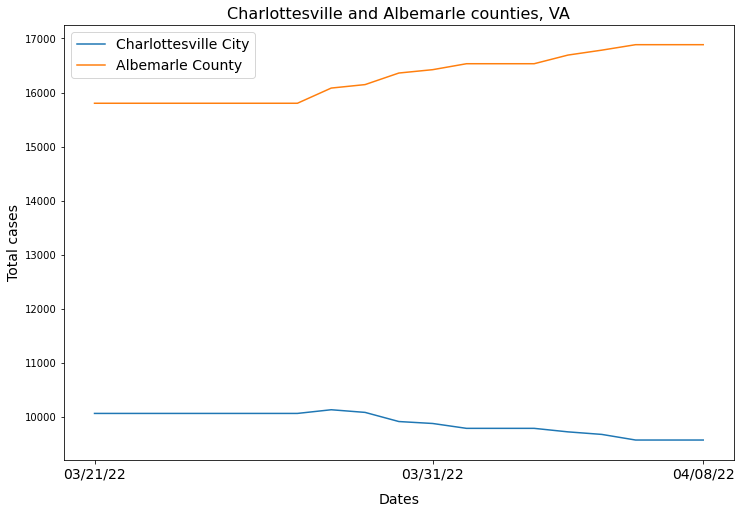

In [61]:
for idx, f in enumerate(fips_to_analyse):
    population = df_pop.loc[df_pop['countyFIPS'] == f]['population'].values[0]
    vax_full = list(df_filter_vax.loc[df_filter_vax['FIPS'] == str(f)]['Series_Complete_Pop_Pct'])
    vax_full = list(reversed(vax_full))
    cases = list(df_filter_cases.loc[df_filter_cases['countyFIPS'] == f][days].values[0])
    cases_per_capita = list(df_filter_cases.loc[df_filter_cases['countyFIPS'] == f][days].values[0]/float(df_pop.loc[(df_pop['countyFIPS'].isin([f]))]['population']))
    x_tmp = list()
    for d in days:
        year, month, day = d.split("-")
        x_tmp.append(month + "/" + day + "/" + year[2:])
    plt.plot(x_tmp,cases, label=counties_to_analyse[idx])
plt.title("Charlottesville and Albemarle counties, VA", fontsize=16)
plt.ylabel("Total cases", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.xticks(['03/21/22', '03/31/22', '04/08/22'], fontsize=14)
plt.legend(fontsize=14)
#plt.rcParams["figure.figsize"] = (14,9)
plt.rcParams["figure.figsize"] = (12,8)
plt.show()

Charlottesville (same plot as in https://dailyprogress.com/news/local/some-covid-19-case-data-in-albemarle-charlottesville-area-is-misleading/article_b3253650-b458-11ec-a266-d39efc6fea97.html)

In [62]:
df_filter_cases

,countyFIPS,County Name,State,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,...,2022-03-30,2022-03-31,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08
2868,51003,Albemarle County,VA,9744,9744,10094,10219,10299,10455,10586,...,16361,16423,16533,16533,16533,16693,16784,16885,16885,16885
2965,51540,City of Charlottesville,VA,6225,6225,6437,6518,6569,6683,6823,...,9917,9881,9791,9791,9791,9726,9679,9575,9575,9575


Blaine County (day by day)

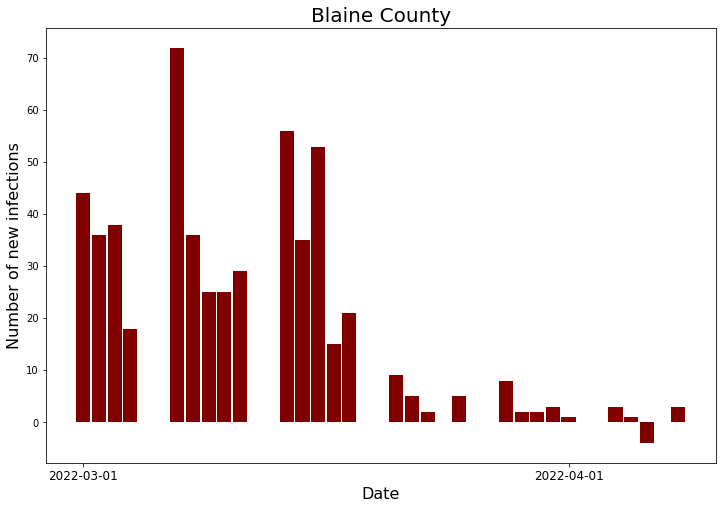

In [63]:
days = ['2022-02-28'] + days_of_months_printer_ww(3, 31) + days_of_months_printer_ww(4, 8)
col_relevant = ['countyFIPS', 'County Name', 'State'] + days
counties_to_analyse = ['Blaine County']
fips_to_analyse = [16013]
df_filter_cases = df_cases.loc[(df_cases['countyFIPS'].isin(fips_to_analyse))][col_relevant]
y_blaine =  list(df_filter_cases.loc[df_filter_cases['countyFIPS'] == fips_to_analyse[0]][days].values[0])
y_blaine = [j-i for i, j in zip(y_blaine[:-1], y_blaine[1:])]
days = days[1:]
plt.bar(days, y_blaine, color ='maroon', width = 0.9)
plt.title("Blaine County", fontsize=20)
plt.ylabel("Number of new infections", fontsize=16)
plt.xlabel("Date", fontsize=16)
plt.xticks(['2022-03-01', '2022-04-01'], fontsize=12)
#plt.xticks(['2022-03-21', '2022-03-31', '2022-04-08'], fontsize=12)
#plt.legend(fontsize=12)
plt.rcParams["figure.figsize"] = (10,7)
#plt.savefig(path + 'fig_bla_cases.png')
plt.show()
#df_filter_cases.loc[df_filter_cases['countyFIPS'] == fips_to_analyse[0]][days]

In [64]:
df_filter_cases

,countyFIPS,County Name,State,2022-02-28,2022-03-01,2022-03-02,2022-03-03,2022-03-04,2022-03-05,2022-03-06,...,2022-03-30,2022-03-31,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08
570,16013,Blaine County,ID,5427,5471,5507,5545,5563,5563,5563,...,5963,5966,5967,5967,5967,5970,5971,5967,5967,5970


In [65]:
counties_to_analyse = ['Albemarle County']
fips_to_analyse = [51003]
days =  days_of_months_printer(1, 31) + days_of_months_printer(2, 28)  + days_of_months_printer(3, 22) + ['04/01/2022']
lst_filter_vax = []
for fips in fips_to_analyse:
    fips_f = '0' * (5 - len(str(fips))) + str(fips)
    lst_filter_vax.extend(df_vax.loc[(df_vax['FIPS'] == fips_f) & (df_vax['Date'].isin(days))].values.tolist())
df_filter_vax = pd.DataFrame(lst_filter_vax, columns = df_vax.columns)
df_filter_vax

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,...,Booster_Doses_Vax_Pct_UR_Equity,Booster_Doses_12PlusVax_Pct_UR_Equity,Booster_Doses_18PlusVax_Pct_UR_Equity,Booster_Doses_65PlusVax_Pct_UR_Equity,Census2019,Census2019_5PlusPop,Census2019_5to17Pop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop
0,04/01/2022,51003,13,Albemarle County,VA,79.2,81036.0,74.1,80949.0,78.1,...,1.0,1.0,1.0,1.0,109330.0,103609.0,15832.0,95093.0,87777.0,21155.0
1,03/22/2022,51003,12,Albemarle County,VA,79.3,80940.0,74.0,80868.0,78.1,...,NaN,NaN,NaN,NaN,109330.0,103609.0,NaN,95093.0,87777.0,21155.0
2,03/21/2022,51003,12,Albemarle County,VA,79.3,80939.0,74.0,80867.0,78.1,...,NaN,NaN,NaN,NaN,109330.0,103609.0,NaN,95093.0,87777.0,21155.0
3,03/20/2022,51003,12,Albemarle County,VA,79.3,80936.0,74.0,80864.0,78.0,...,NaN,NaN,NaN,NaN,109330.0,103609.0,NaN,95093.0,87777.0,21155.0
4,03/19/2022,51003,11,Albemarle County,VA,79.3,80927.0,74.0,80855.0,78.0,...,NaN,NaN,NaN,NaN,109330.0,103609.0,NaN,95093.0,87777.0,21155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,01/05/2022,51003,1,Albemarle County,VA,80.5,78245.0,71.6,78214.0,75.5,...,NaN,NaN,NaN,NaN,109330.0,103609.0,NaN,95093.0,87777.0,21155.0
78,01/04/2022,51003,1,Albemarle County,VA,80.6,78228.0,71.6,78197.0,75.5,...,NaN,NaN,NaN,NaN,109330.0,103609.0,NaN,95093.0,87777.0,21155.0
79,01/03/2022,51003,1,Albemarle County,VA,80.6,78215.0,71.5,78184.0,75.5,...,NaN,NaN,NaN,NaN,109330.0,103609.0,NaN,95093.0,87777.0,21155.0
80,01/02/2022,51003,1,Albemarle County,VA,80.6,78154.0,71.5,78123.0,75.4,...,NaN,NaN,NaN,NaN,109330.0,103609.0,NaN,95093.0,87777.0,21155.0


In [66]:
days = days_of_months_printer_ww(1, 31) + days_of_months_printer_ww(2, 28) + days_of_months_printer_ww(3, 22) + ['2022-04-01']
col_relevant = ['countyFIPS', 'County Name', 'State'] + days
df_filter_cases = df_cases.loc[(df_cases['countyFIPS'].isin(fips_to_analyse))][col_relevant]

In [67]:
#Albemarle
population = df_pop.loc[df_pop['countyFIPS'] == 51003]['population'].values[0]
vax_full = list(df_filter_vax.loc[df_filter_vax['FIPS'] == '51003']['Series_Complete_Pop_Pct'])
vax_full = list(reversed(vax_full))
cases_per_capita = list(df_filter_cases.loc[df_filter_cases['countyFIPS'] == 51003][days].values[0])

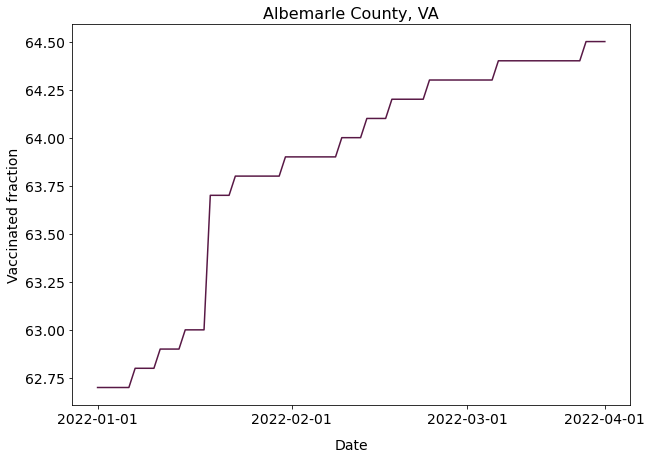

In [68]:
plt.title("Albemarle County, VA", fontsize=16)
plt.ylabel("Vaccinated fraction", fontsize=14)
plt.xlabel("Date", fontsize=14, labelpad=12)
plt.plot(days,vax_full, color='#581845')
plt.xticks(['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01'], fontsize=14)
plt.yticks(fontsize=14)
plt.rcParams["figure.figsize"] = (12,8)
#plt.savefig(path + 'fig_vax_alb.png')
plt.show()